In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
df=pd.DataFrame(dataset.data , columns=['age' , 'sex' ,'bmi','bp' , 's1' ,'s2','s3' , 's4' ,'s5' , 's6'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X=df
y=dataset['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test= train_test_split( X , y , test_size=0.2 , random_state=10)

In [11]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
252,0.005383,-0.044642,0.059541,-0.056177,0.024574,0.052861,-0.043401,0.050914,-0.004222,-0.030072
416,-0.027310,-0.044642,0.080019,0.098751,-0.002945,0.018101,-0.017629,0.003312,-0.029526,0.036201
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207
163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023647,0.061054
253,0.081666,-0.044642,0.033673,0.008101,0.052093,0.056619,-0.017629,0.034309,0.034866,0.069338


In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

### Hyperparameter Tuning

In [13]:
params={
    'criterion':['squared_error' , 'friedman_mse' , 'absolute_error'] ,
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10, 15, 20 , 25],
    'max_features':['auto', 'sqrt' , 'log2']
}

In [14]:
params

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [15]:
from sklearn.model_selection import GridSearchCV
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor , param_grid=params , cv=5 , scoring='neg_mean_squared_error')

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [17]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [18]:
y_pred=grid.predict(X_test)

In [19]:
from sklearn.metrics import r2_score , mean_absolute_error
print(r2_score( y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.2291895917883311
55.394891789302356


In [20]:
selected_model=DecisionTreeRegressor(criterion= 'squared_error',
 max_depth= 2,
 max_features= 'sqrt',
 splitter= 'best')

In [22]:
selected_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt')

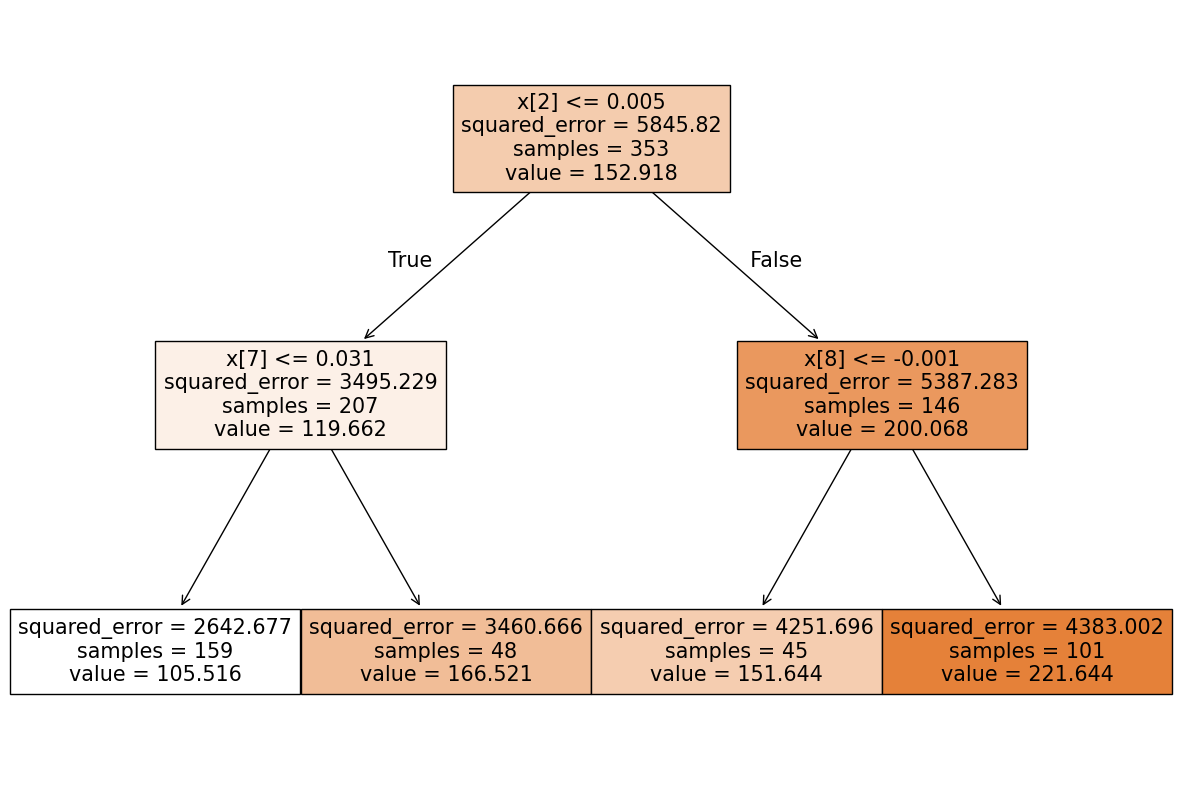

In [27]:
#Visulaize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model, filled=True )
plt.show()
